In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import time

def scrape_books():
    base_url = "http://books.toscrape.com/"
    all_books = []
    
    for page in range(1, 2):  # Scrape first 2 pages (modify as needed)
        print(f"Scraping page {page}...")
        url = f"{base_url}catalogue/page-{page}.html"
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        
        books = soup.find_all('article', class_='product_pod')
        
        for book in books:
            title = book.h3.a['title']
            price = book.find('p', class_='price_color').text
            rating = book.p['class'][1]  # One of: One, Two, Three, Four, Five
            availability = book.find('p', class_='instock availability').text.strip()
            
            # Get more details from individual book page
            book_url = base_url + 'catalogue/' + book.h3.a['href']
            book_response = requests.get(book_url)
            book_soup = BeautifulSoup(book_response.text, 'html.parser')
            
            # Extract additional details
            description = book_soup.find('meta', attrs={'name': 'description'})['content'].strip()
            upc = book_soup.find('th', text='UPC').find_next_sibling('td').text
            product_type = book_soup.find('th', text='Product Type').find_next_sibling('td').text
            price_excl_tax = book_soup.find('th', text='Price (excl. tax)').find_next_sibling('td').text
            price_incl_tax = book_soup.find('th', text='Price (incl. tax)').find_next_sibling('td').text
            tax = book_soup.find('th', text='Tax').find_next_sibling('td').text
            num_reviews = book_soup.find('th', text='Number of reviews').find_next_sibling('td').text
            
            all_books.append({
                'title': title,
                'price': price,
                'rating': rating,
                'availability': availability,
                'upc': upc,
                'product_type': product_type,
                'price_excl_tax': price_excl_tax,
                'price_incl_tax': price_incl_tax,
                'tax': tax,
                'num_reviews': num_reviews,
                'description': description
            })
            
            time.sleep(1)  # Be polite with delay between requests
    
    return pd.DataFrame(all_books)

# Run the scraper
books_df = scrape_books()
books_df.to_csv('raw_books_data.csv', index=False)

Scraping page 1...


C:\Users\amro8\AppData\Local\Temp\ipykernel_6952\705877921.py:32: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  upc = book_soup.find('th', text='UPC').find_next_sibling('td').text
C:\Users\amro8\AppData\Local\Temp\ipykernel_6952\705877921.py:33: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  product_type = book_soup.find('th', text='Product Type').find_next_sibling('td').text
C:\Users\amro8\AppData\Local\Temp\ipykernel_6952\705877921.py:34: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  price_excl_tax = book_soup.find('th', text='Price (excl. tax)').find_next_sibling('td').text
C:\Users\amro8\AppData\Local\Temp\ipykernel_6952\705877921.py:35: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  price_incl_tax = book_soup.find('th', text='Price (incl. tax)').find_next_sibling

In [4]:
books_df

,title,price,rating,availability,upc,product_type,price_excl_tax,price_incl_tax,tax,num_reviews,description
0,A Light in the Attic,Â£51.77,Three,In stock,a897fe39b1053632,Books,Â£51.77,Â£51.77,Â£0.00,0,It's hard to imagine a world without A Light i...
1,Tipping the Velvet,Â£53.74,One,In stock,90fa61229261140a,Books,Â£53.74,Â£53.74,Â£0.00,0,"""Erotic and absorbing...Written with starling ..."
2,Soumission,Â£50.10,One,In stock,6957f44c3847a760,Books,Â£50.10,Â£50.10,Â£0.00,0,"Dans une France assez proche de la nÃ´tre, un ..."
3,Sharp Objects,Â£47.82,Four,In stock,e00eb4fd7b871a48,Books,Â£47.82,Â£47.82,Â£0.00,0,"WICKED above her hipbone, GIRL across her hear..."
4,Sapiens: A Brief History of Humankind,Â£54.23,Five,In stock,4165285e1663650f,Books,Â£54.23,Â£54.23,Â£0.00,0,From a renowned historian comes a groundbreaki...
5,The Requiem Red,Â£22.65,One,In stock,f77dbf2323deb740,Books,Â£22.65,Â£22.65,Â£0.00,0,Patient Twenty-nine.A monster roams the halls ...
6,The Dirty Little Secrets of Getting Your Dream...,Â£33.34,Four,In stock,2597b5a345f45e1b,Books,Â£33.34,Â£33.34,Â£0.00,0,Drawing on his extensive experience evaluating...
7,The Coming Woman: A Novel Based on the Life of...,Â£17.93,Three,In stock,e72a5dfc7e9267b2,Books,Â£17.93,Â£17.93,Â£0.00,0,"""If you have a heart, if you have a soul, Kare..."
8,The Boys in the Boat: Nine Americans and Their...,Â£22.60,Four,In stock,e10e1e165dc8be4a,Books,Â£22.60,Â£22.60,Â£0.00,0,For readers of Laura Hillenbrand's Seabiscuit ...
9,The Black Maria,Â£52.15,One,In stock,1dfe412b8ac00530,Books,Â£52.15,Â£52.15,Â£0.00,0,"Praise for Aracelis Girmay:""[Girmay's] every l..."


In [5]:
def clean_data(df):
    # Clean price columns
    price_columns = ['price', 'price_excl_tax', 'price_incl_tax', 'tax']
    for col in price_columns:
        df[col] = df[col].apply(lambda x: float(re.sub(r'[^\d.]', '', x)))
    
    # Convert rating to numerical (1-5)
    rating_map = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
    df['rating'] = df['rating'].map(rating_map)
    
    # Clean availability - extract number
    df['availability'] = df['availability'].apply(
        lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else 0)
    
    # Clean description - remove extra whitespace
    df['description'] = df['description'].str.strip()
    
    # Convert num_reviews to integer
    df['num_reviews'] = df['num_reviews'].astype(int)
    
    return df

cleaned_df = clean_data(books_df)
cleaned_df.to_csv('cleaned_books_data.csv', index=False)

In [6]:
def analyze_data(df):
    # Basic statistics
    print("Basic Statistics:")
    print(df.describe())
    
    # Price analysis
    print("\nPrice Analysis:")
    print(f"Average price: £{df['price'].mean():.2f}")
    print(f"Most expensive book: {df.loc[df['price'].idxmax()]['title']} (£{df['price'].max():.2f})")
    
    # Rating distribution
    print("\nRating Distribution:")
    print(df['rating'].value_counts().sort_index())
    
    # Availability analysis
    print("\nAvailability Analysis:")
    print(f"Total books available: {df['availability'].sum()}")
    
    return df

analysis_results = analyze_data(cleaned_df)

Basic Statistics:
           price     rating  availability  price_excl_tax  price_incl_tax  \
count  20.000000  20.000000          20.0       20.000000       20.000000   
mean   38.048500   2.850000           0.0       38.048500       38.048500   
std    15.135231   1.565248           0.0       15.135231       15.135231   
min    13.990000   1.000000           0.0       13.990000       13.990000   
25%    22.637500   1.000000           0.0       22.637500       22.637500   
50%    41.380000   3.000000           0.0       41.380000       41.380000   
75%    51.865000   4.000000           0.0       51.865000       51.865000   
max    57.250000   5.000000           0.0       57.250000       57.250000   

        tax  num_reviews  
count  20.0         20.0  
mean    0.0          0.0  
std     0.0          0.0  
min     0.0          0.0  
25%     0.0          0.0  
50%     0.0          0.0  
75%     0.0          0.0  
max     0.0          0.0  

Price Analysis:
Average price: £38.05
Most e

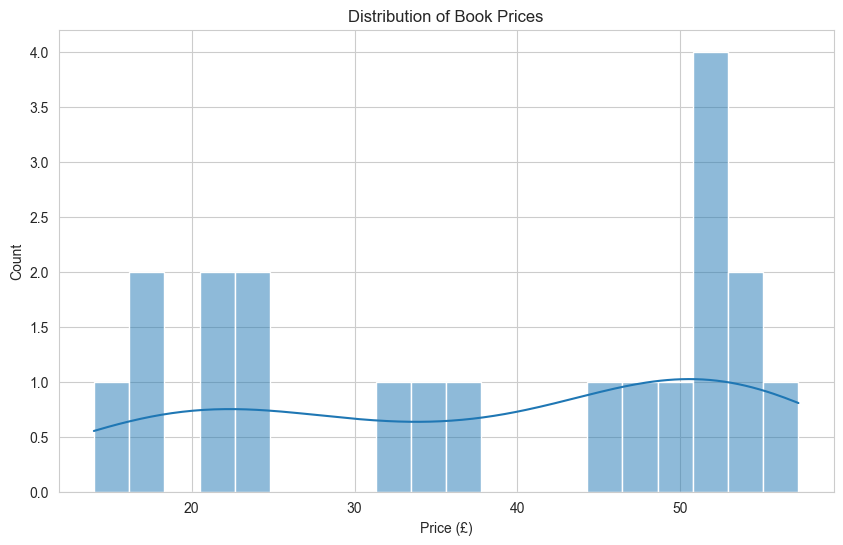

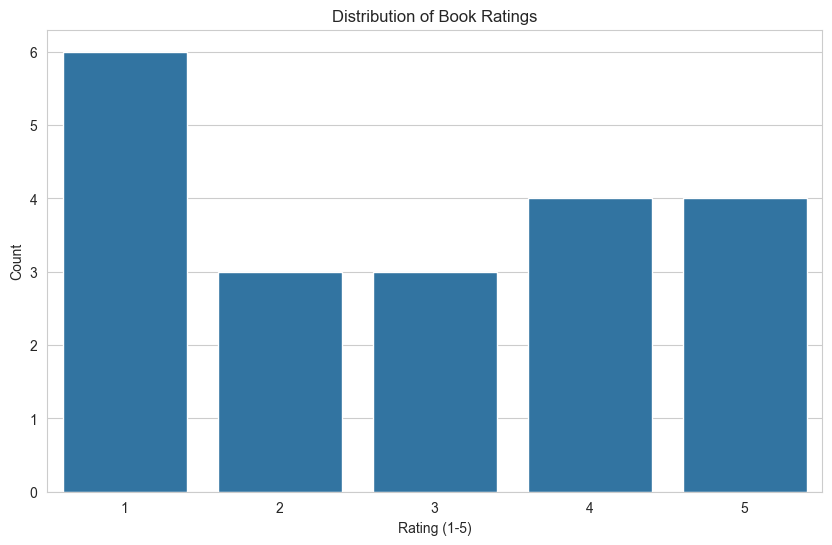

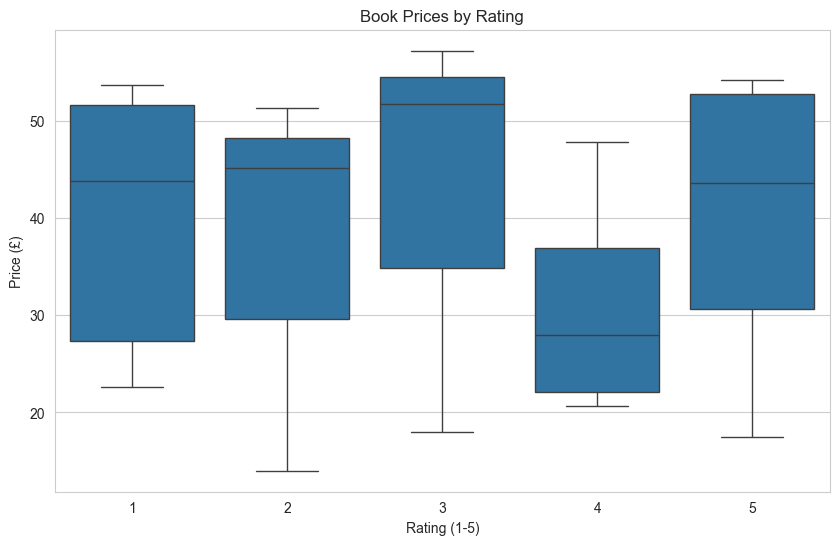

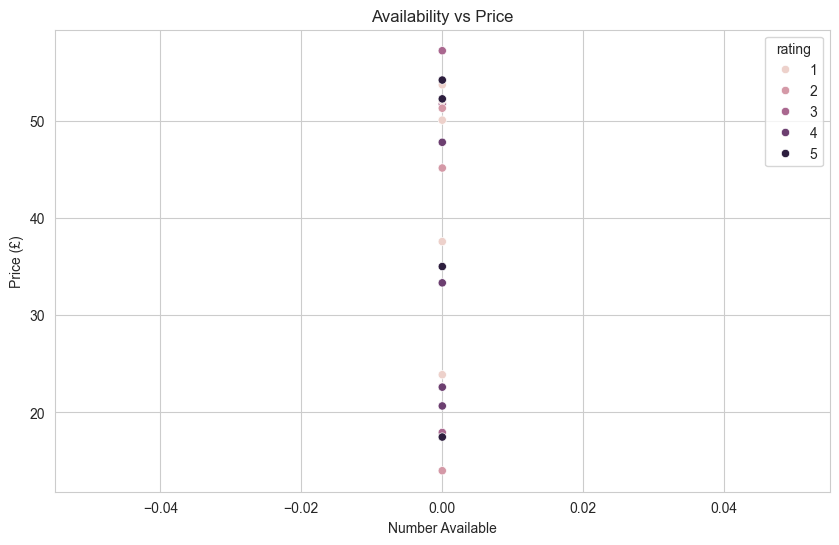

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_data(df):
    # Set style
    sns.set_style('whitegrid')
    
    # Price distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(df['price'], bins=20, kde=True)
    plt.title('Distribution of Book Prices')
    plt.xlabel('Price (£)')
    plt.ylabel('Count')
    plt.show()
    
    # Rating distribution
    plt.figure(figsize=(10, 6))
    sns.countplot(x='rating', data=df)
    plt.title('Distribution of Book Ratings')
    plt.xlabel('Rating (1-5)')
    plt.ylabel('Count')
    plt.show()
    
    # Price vs Rating
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='rating', y='price', data=df)
    plt.title('Book Prices by Rating')
    plt.xlabel('Rating (1-5)')
    plt.ylabel('Price (£)')
    plt.show()
    
    # Availability vs Price
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='availability', y='price', data=df, hue='rating')
    plt.title('Availability vs Price')
    plt.xlabel('Number Available')
    plt.ylabel('Price (£)')
    plt.show()

visualize_data(cleaned_df)